In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bike%20Prices.csv')
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [45]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [46]:
df.isnull().sum()

Brand                  0
Model                  0
Selling_Price          0
Year                   0
Seller_Type            0
Owner                  0
KM_Driven              0
Ex_Showroom_Price    435
dtype: int64

In [47]:
corr = df.corr()

In [48]:
corr['Ex_Showroom_Price'].sort_values(ascending=False)

Ex_Showroom_Price    1.000000
Selling_Price        0.918583
Year                 0.126378
KM_Driven           -0.122011
Name: Ex_Showroom_Price, dtype: float64

In [49]:
df.dropna(inplace=True)

In [50]:
df.isnull().sum()

Brand                0
Model                0
Selling_Price        0
Year                 0
Seller_Type          0
Owner                0
KM_Driven            0
Ex_Showroom_Price    0
dtype: int64

In [51]:
df['Brand'].value_counts()

Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
Activa        3
UM            3
Vespa         2
Harley        2
Benelli       1
Yo            1
Hyosung       1
BMW           1
Name: Brand, dtype: int64

In [52]:
df['Model'].value_counts()

Honda Activa [2000-2015]      23
Honda CB Hornet 160R          22
Bajaj Pulsar 180              20
Bajaj Discover 125            16
Yamaha FZ S V 2.0             16
                              ..
TVS Radeon                     1
Hero  Ignitor Disc             1
Bajaj V12                      1
Yamaha Cygnus Ray ZR           1
Harley-Davidson Street Bob     1
Name: Model, Length: 183, dtype: int64

In [53]:
df['Seller_Type'].value_counts()

Individual    623
Dealer          3
Name: Seller_Type, dtype: int64

In [54]:
df['Owner'].value_counts()

1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
Name: Owner, dtype: int64

In [55]:
dummies = pd.get_dummies(df,columns = ['Seller_Type','Owner'],drop_first=True)
dummies.head()

,Brand,Model,Selling_Price,Year,KM_Driven,Ex_Showroom_Price,Seller_Type_Individual,Owner_2nd owner,Owner_3rd owner,Owner_4th owner
0,TVS,TVS XL 100,30000,2017,8000,30490.0,1,0,0,0
1,Bajaj,Bajaj ct 100,18000,2017,35000,32000.0,1,0,0,0
2,Yo,Yo Style,20000,2011,10000,37675.0,1,0,0,0
3,Bajaj,Bajaj Discover 100,25000,2010,43000,42859.0,1,0,0,0
4,Bajaj,Bajaj Discover 100,24999,2012,35000,42859.0,1,1,0,0


In [56]:
y =dummies['Selling_Price']

In [57]:
x = dummies.drop(['Brand','Model','Selling_Price'],axis =1)

In [61]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state =2529)

In [62]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [63]:
lr.score(xtest,ytest)

0.8844996899245731

Text(0, 0.5, 'predicted values')

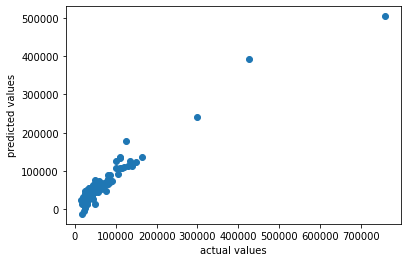

In [64]:
y_pred = lr.predict(xtest)

plt.scatter(ytest,y_pred)
plt.xlabel('actual values')
plt.ylabel('predicted values')